In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(color_codes=True)

In [ ]:
data=pd.read_csv("/content/Travel Insurance Prediction Data Set CSV File.csv")

In [ ]:
data.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
## DATA PREPROCESSING

In [ ]:
data.select_dtypes(include='object')

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
0,Government Sector,Yes,No,No
1,Private Sector/Self Employed,Yes,No,No
2,Private Sector/Self Employed,Yes,No,No
3,Private Sector/Self Employed,Yes,No,No
4,Private Sector/Self Employed,Yes,Yes,No
...,...,...,...,...
1982,Private Sector/Self Employed,Yes,Yes,Yes
1983,Private Sector/Self Employed,Yes,No,Yes
1984,Private Sector/Self Employed,Yes,No,No
1985,Private Sector/Self Employed,Yes,Yes,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [ ]:
data.select_dtypes(include='int').nunique()

Unnamed: 0         1987
Age                  11
AnnualIncome         30
FamilyMembers         8
ChronicDiseases       2
TravelInsurance       2
dtype: int64

In [ ]:
data.shape

(1987, 10)

In [ ]:
## Removing unnecessary columns i.e. unnamed column because it will not be used during prediction

data.drop(columns='Unnamed: 0',inplace=True)
data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
## EXPLORATORY DATA ANALYSIS

In [ ]:
#EDA on categorical variables

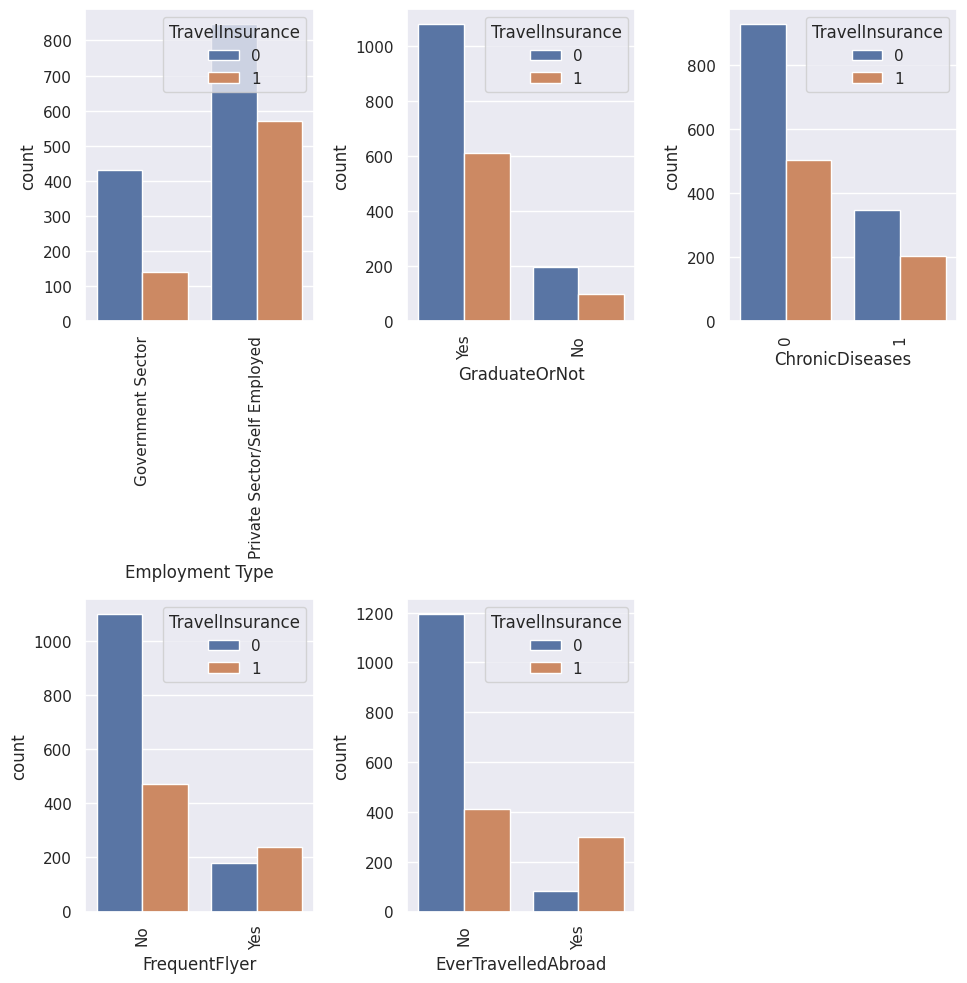

In [ ]:
#list of categorical variables to plot

cat_vars=['Employment Type','GraduateOrNot','ChronicDiseases','FrequentFlyer','EverTravelledAbroad']

#create figure with subplots

fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(10,10))
axs=axs.flatten()

#axs is subplot number
#subplots are created to make multiple plots at one time, we use .flatten because flattened numpy arrays are easy to iterate
# .flatten() function is used to return a copy of the array such that it is squashed into one dimension

#create barplot for each categorical variable
for i,var in enumerate(cat_vars):
#enumerate() in for loop is used as a iterable that is count the number of iterations, i gives the count of iteration and var gives the value at that count, this can also be done using range(len(data)) or through indexing
  sns.countplot(x=var,hue='TravelInsurance',data=data,ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
#hue is used to represent the yes or no of deciding/predicting column with the help of different colours, we cannot use hue without x and y

#adjust spacing between subplots
fig.tight_layout()

#remove the sixth subplot (which was an empty plot)
fig.delaxes(axs[5])

#show plot
plt.show()

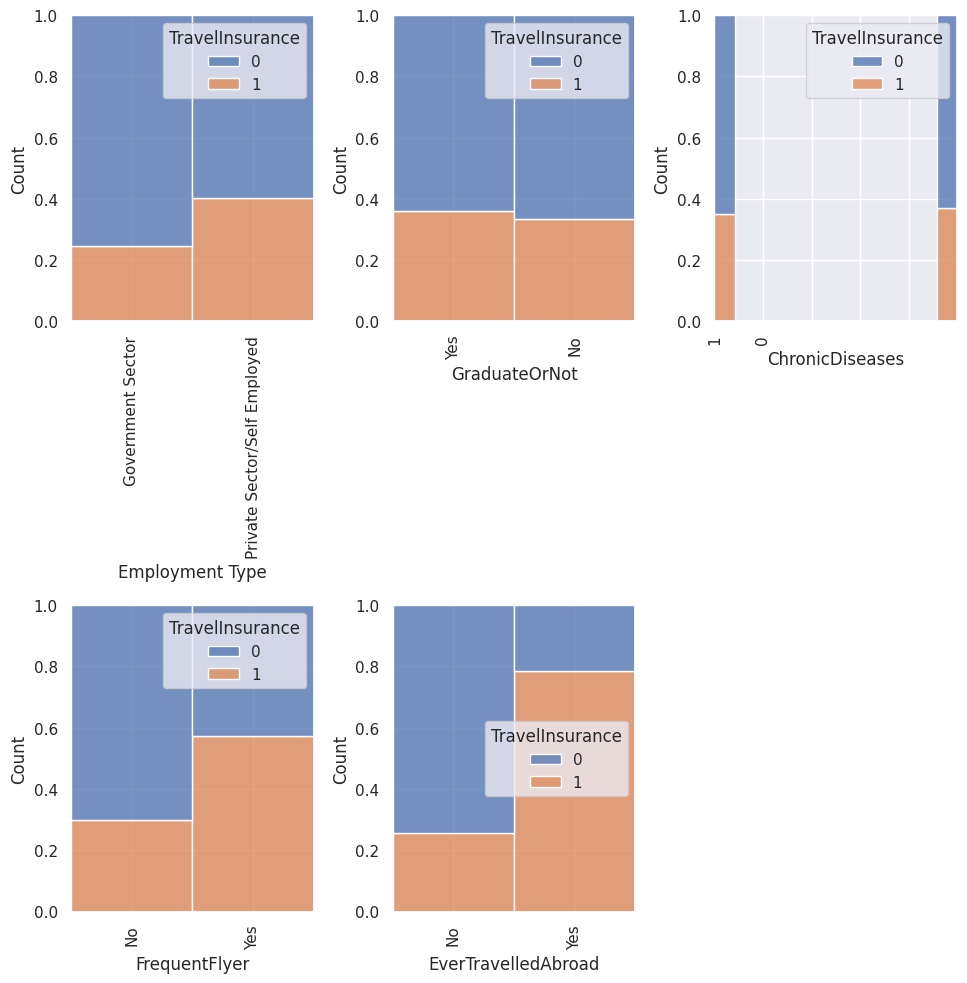

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#warnings tell the user that the operation is exceptional, it is different from an error because in an error program stops working whereas in warnings program shows a message but it still runs
# .filterwarnings("ignore") means the message won't be printed.

#list of categorical variables to plot
cat_vars=['Employment Type','GraduateOrNot','ChronicDiseases','FrequentFlyer','EverTravelledAbroad']

#create figure with subplots
fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(10,10))
axs=axs.flatten()

#create histplot for each categorical variables
for i,var in enumerate(cat_vars):
  sns.histplot(x=var,hue="TravelInsurance",data=data,ax=axs[i],multiple='fill',kde=False,element='bars',fill=True)
  axs[i].set_xticklabels(data[var].unique(),rotation=90)
  axs[i].set_xlabel(var)

#adjust spacing between subplots
fig.tight_layout()

#remove the sixth subplot
fig.delaxes(axs[5])

#show plot
plt.show()


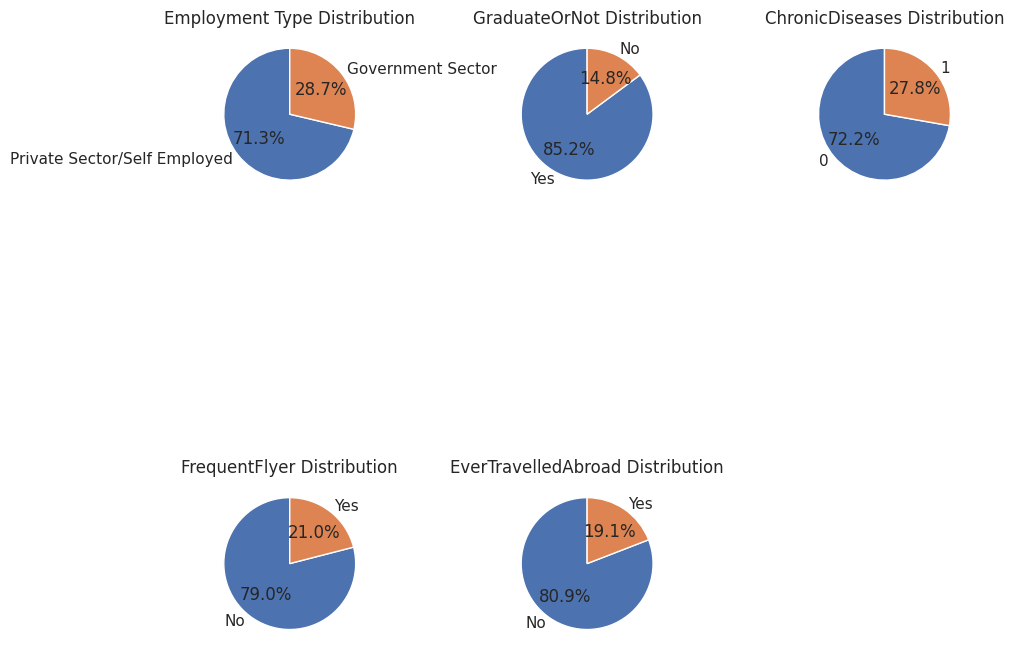

In [ ]:
#list of categorical variables to plot
cat_vars=['Employment Type','GraduateOrNot','ChronicDiseases','FrequentFlyer','EverTravelledAbroad']

#create figure with subplots
fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(10,10))
axs=axs.flatten()

#create a pie chart for each categorical variable
for i,var in enumerate(cat_vars):
  if i<len(axs.flat):
    #count the number of occurences for each category
    cat_counts=data[var].value_counts()

    #create a pie chart
    axs.flat[i].pie(cat_counts,labels=cat_counts.index,autopct='%1.1f%%',startangle=90)
    #autopct to write the percentage value on the wedges of the pie chart and show the shift of decimals

    #set a title for each subplot
    axs.flat[i].set_title(f'{var} Distribution')

#adjust spacing between subplots
fig.tight_layout()

#remove the extra subplot
fig.delaxes(axs[5])

#show the plot
plt.show()

In [ ]:
#EDA on numerical variables

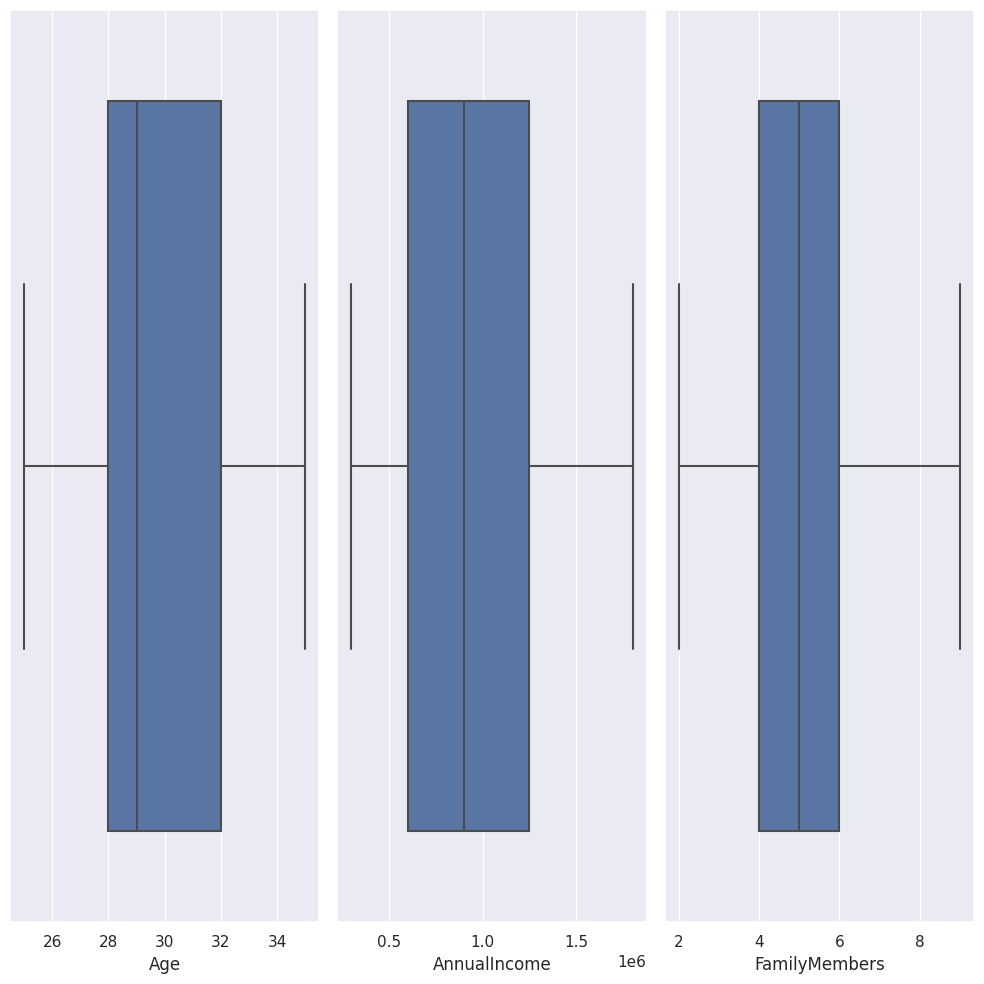

In [ ]:
#list of numerical variables
num_vars=['Age','AnnualIncome','FamilyMembers']

fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(10,10))
axs=axs.flatten()

#creating boxplots
for i,var in enumerate(num_vars):
  sns.boxplot(x=var,data=data,ax=axs[i])

#adjusting space between subplots
fig.tight_layout()

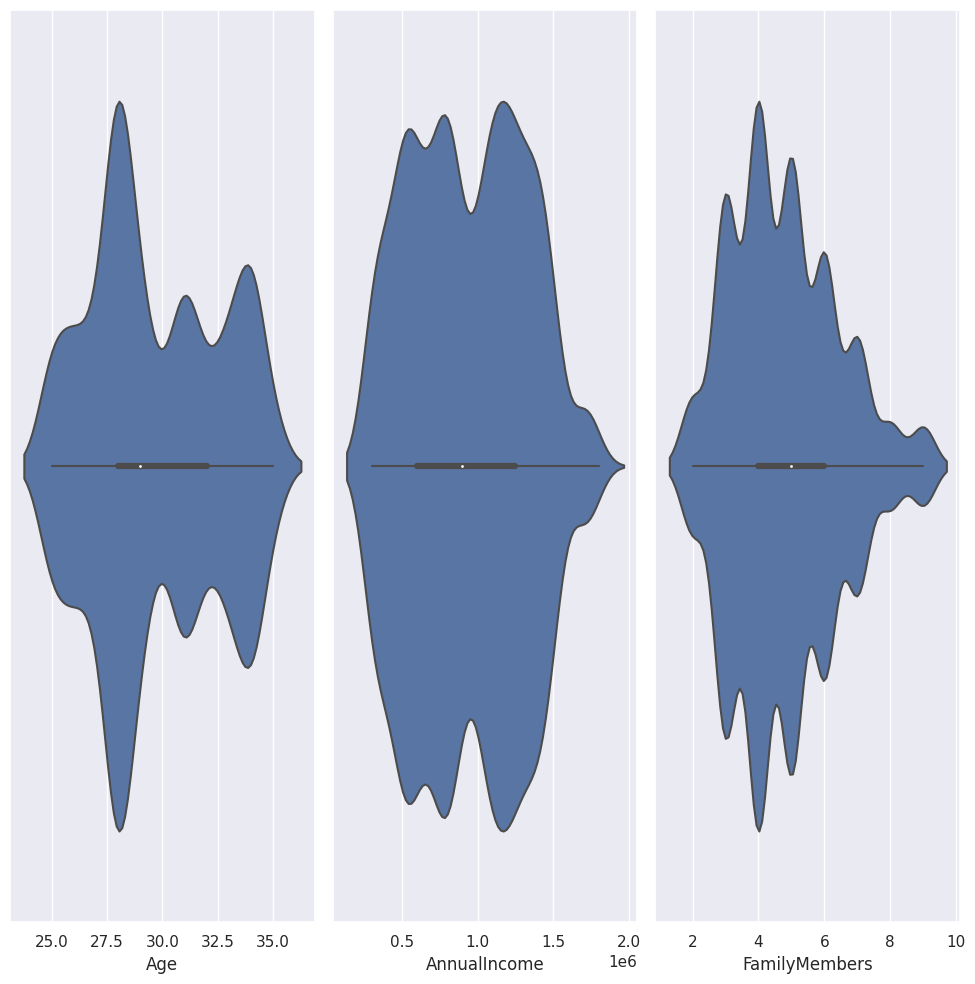

In [ ]:
#list of numerical variables
num_vars=['Age','AnnualIncome','FamilyMembers']

fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(10,10))
axs=axs.flatten()

#creating violin plots based on only numerical variables
for i,var in enumerate(num_vars):
  sns.violinplot(x=var,data=data,ax=axs[i],orient='h')
#violin plot is similar to box plot representing distribution of quantitative data across various levels of categorical variables. Unlike box plot in which all the plot components caorrespond to actual data points,in violin plot the kernal density estimate are shown
#KDE=non parametric way to estimate the probability density function of a random variable

fig.tight_layout()

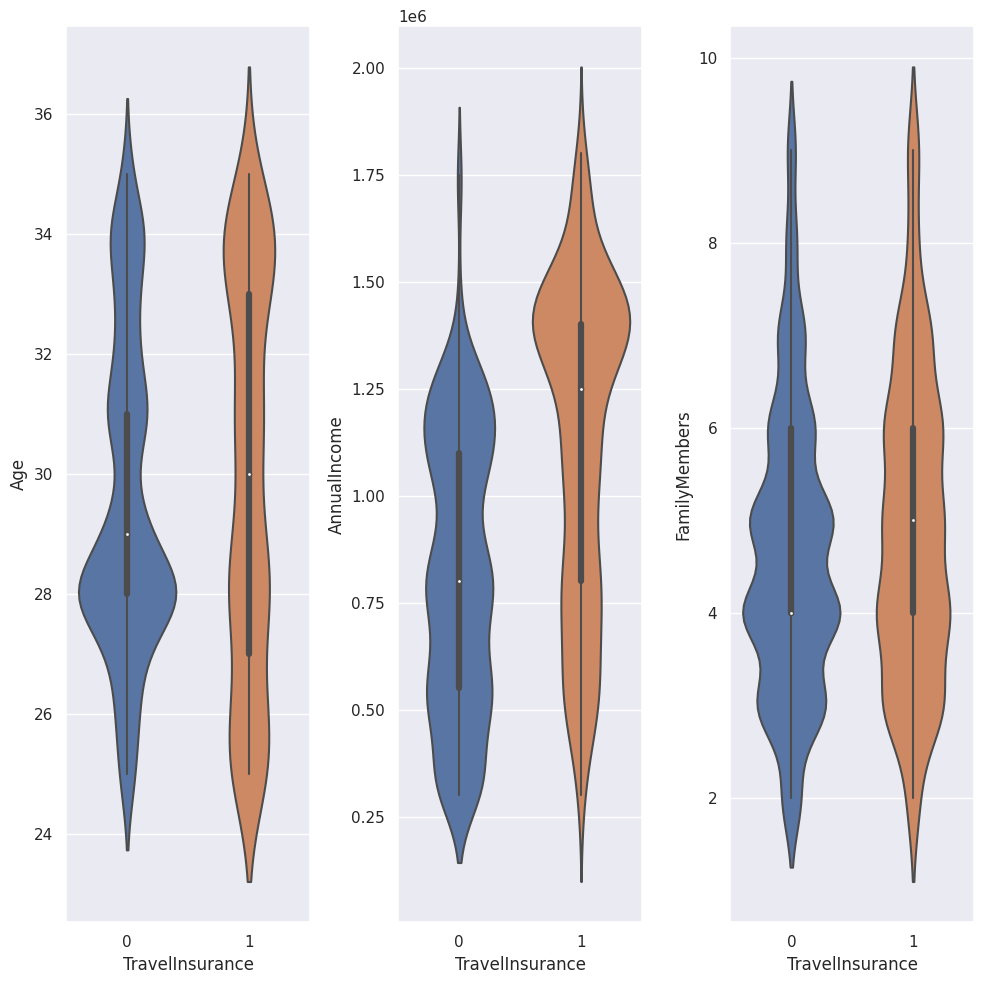

In [ ]:
#list of numerical variables
num_vars=['Age','AnnualIncome','FamilyMembers']

fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(10,10))
axs=axs.flatten()

#creating violin plots based on numerical variables and predicting column
for i,var in enumerate(num_vars):
  sns.violinplot(x='TravelInsurance',y=var,data=data,ax=axs[i],orient='v')

fig.tight_layout()

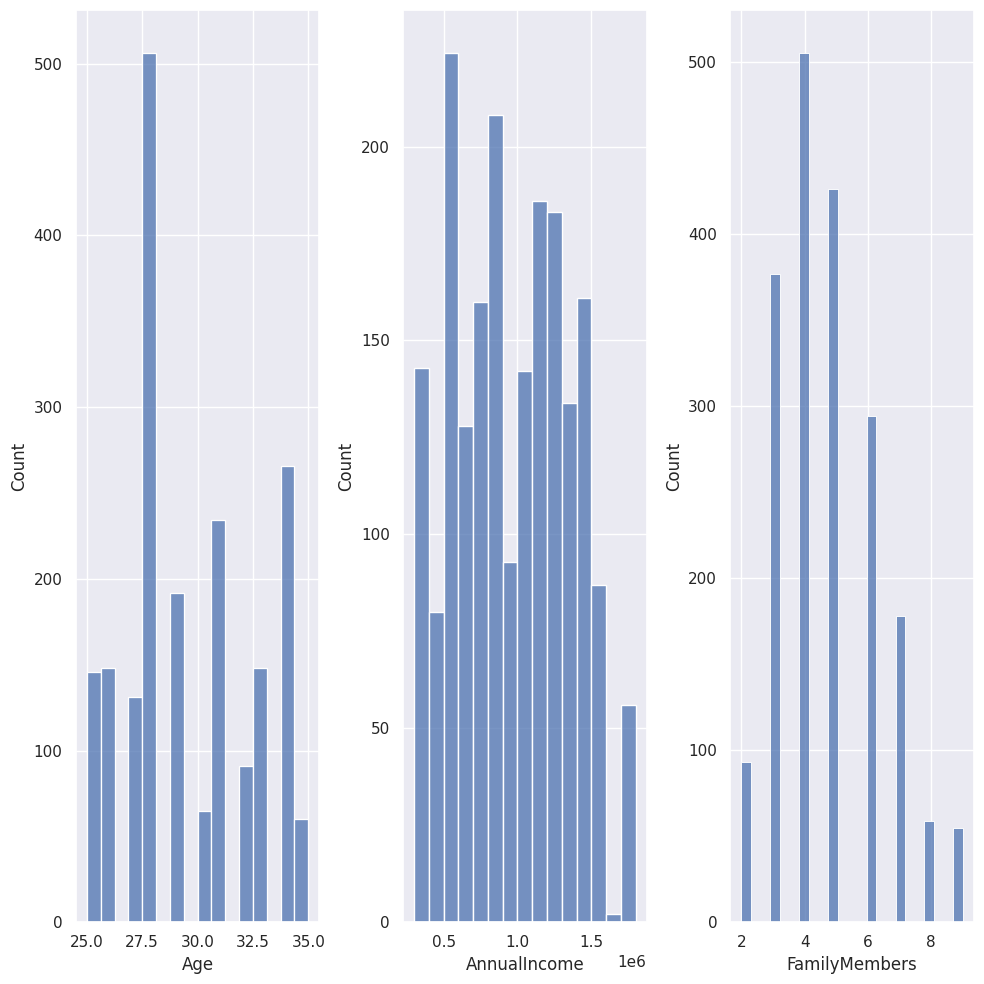

In [ ]:
#list of numerical variables
num_vars=['Age','AnnualIncome','FamilyMembers']

fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(10,10))
axs=axs.flatten()

#creating histplots for numerical variables
for i,var in enumerate(num_vars):
  sns.histplot(x=var,data=data,ax=axs[i])

fig.tight_layout()

In [ ]:
#DATA PREPROCESSING PART 2

In [ ]:
data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
#MISSING VALUES

#Checking missing values
check_missing=data.isnull().mean()
check_missing

#if missing values are present arrange them in ascending order
check_missing[check_missing>0].sort_values(ascending=False)

Series([], dtype: float64)

In [ ]:
#LABEL ENCODING

#loop over each column in the DataFrame where the dtype is 'object'
for col in data.select_dtypes(include=['object']).columns:
  print(f'{col}:{data[col].unique()}')

Employment Type:['Government Sector' 'Private Sector/Self Employed']
GraduateOrNot:['Yes' 'No']
FrequentFlyer:['No' 'Yes']
EverTravelledAbroad:['No' 'Yes']


In [ ]:
#using ONE-HOT ENCODING
pd.get_dummies(data,drop_first=True)

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,Employment Type_Private Sector/Self Employed,GraduateOrNot_Yes,FrequentFlyer_Yes,EverTravelledAbroad_Yes
0,31,400000,6,1,0,0,1,0,0
1,31,1250000,7,0,0,1,1,0,0
2,34,500000,4,1,1,1,1,0,0
3,28,700000,3,1,0,1,1,0,0
4,28,700000,8,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...
1982,33,1500000,4,0,1,1,1,1,1
1983,28,1750000,5,1,0,1,1,0,1
1984,28,1150000,6,1,0,1,1,0,0
1985,34,1000000,6,0,1,1,1,1,1


In [ ]:
#using LABEL ENCODER

from sklearn import preprocessing

for col in data.select_dtypes(include=['object']).columns:
  label_encoder=preprocessing.LabelEncoder()
  label_encoder.fit(data[col].unique())
  #transform the column using the encoder
  data[col]=label_encoder.transform(data[col])
  print(f'{col}:{data[col].unique()}')

Employment Type:[0 1]
GraduateOrNot:[1 0]
FrequentFlyer:[0 1]
EverTravelledAbroad:[0 1]


In [ ]:
#IMBALANCED DATASET

#checking for imbalanced dataset
data['TravelInsurance'].value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

<Axes: xlabel='TravelInsurance', ylabel='count'>

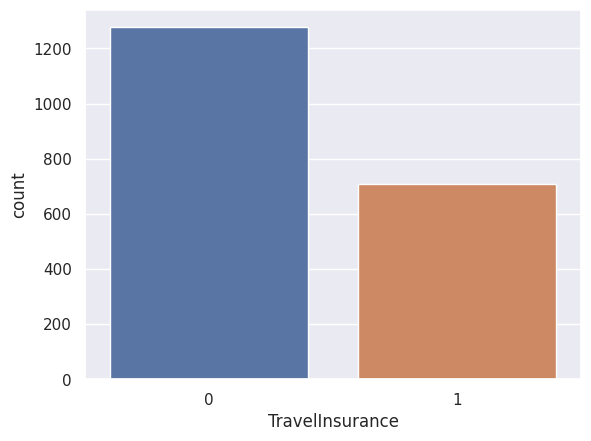

In [ ]:
#checking for imbalanced dataset graphically
sns.countplot(x='TravelInsurance',data=data)

In [ ]:
#The data is imbalanced, we can balance in the ML model using class_weight='balanced'

In [ ]:
#From the EDA(boxplot) we can conclude that there are no outliers

<Axes: >

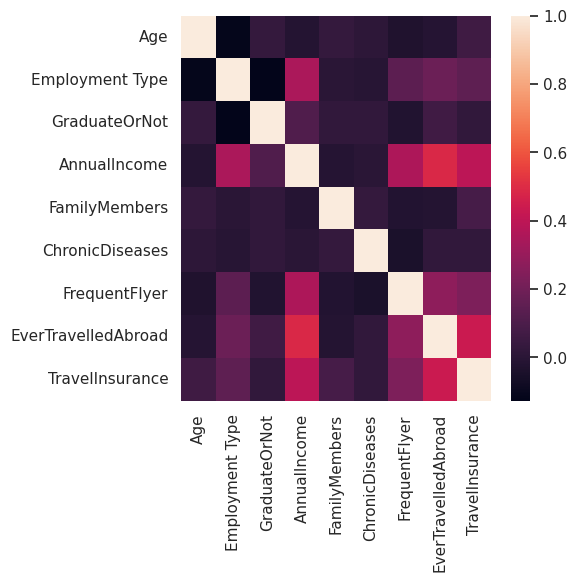

In [ ]:
#creating a heatmap to check correlation between variables
plt.figure(figsize=(5,5))
sns.heatmap(data.corr())

In [ ]:
#Separating Dependent and Independent variables

x=data.drop("TravelInsurance",axis=1)
#axis=1 is for column and axis=0 is for rows
y=data["TravelInsurance"]

In [ ]:
#TRAIN-TEST SPLIT
#20% test data 80% training data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
#Applying Machine Learning algorithms

In [ ]:
#DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
dtree=DecisionTreeClassifier(class_weight='balanced')
param_grid={'max_depth':[3,4,5,6,7,8],'min_samples_split':[2,3,4],'min_samples_leaf':[1,2,3,4],'random_state':[0,42]}

#perform GridSearchCV to find the best parameters
grid_search=GridSearchCV(dtree,param_grid,cv=5)
#cv gives that 5 pairs of train and test split will be done
#number of fit = number of iterations*cv, (6*3*4*2)*5
grid_search.fit(x_train,y_train)

#print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [ ]:
dtree=DecisionTreeClassifier(random_state=0,max_depth=3,min_samples_leaf=1,min_samples_split=2,class_weight='balanced')
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dtree_accuracy=accuracy_score(y_test,y_pred)*100
print('Accuracy Score:',round(accuracy_score(y_test,y_pred)*100,3))
#round(): rounds off the answer to given number of digits

Accuracy Score: 82.663


In [ ]:
from sklearn.metrics import f1_score,precision_score,recall_score,jaccard_score,log_loss
print('F1 Score:',(f1_score(y_test,y_pred,average='micro')))
print("Precision Score:",(precision_score(y_test,y_pred,average='micro')))
print("Recall Score:",(recall_score(y_test,y_pred,average='micro')))
print("Jaccard Score:",jaccard_score(y_test,y_pred,average='micro'))
print("Log Loss:",(log_loss(y_test,y_pred)))
#log loss gives probability of y_pred for y_test

F1 Score: 0.8266331658291457
Precision Score: 0.8266331658291457
Recall Score: 0.8266331658291457
Jaccard Score: 0.7044967880085653
Log Loss: 6.248774080022822


In [ ]:
dtree.feature_importances_
#Feature Importance refers to a techniques that assign a score to input features based on how useful they are predicting a target variable using decision tree

array([1.28812165e-01, 0.00000000e+00, 6.45137109e-04, 6.66579510e-01,
       2.03963188e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [ ]:
imp_df=pd.DataFrame({"Feature Name":x_train.columns,"Importance":dtree.feature_importances_})
fi=imp_df.sort_values(by="Importance",ascending=False)
fi2=fi.head(10)
fi2
#arranging the features in descending order of importance

,Feature Name,Importance
3,AnnualIncome,0.666580
4,FamilyMembers,0.203963
0,Age,0.128812
2,GraduateOrNot,0.000645
1,Employment Type,0.000000
5,ChronicDiseases,0.000000
6,FrequentFlyer,0.000000
7,EverTravelledAbroad,0.000000


In [ ]:
fi

,Feature Name,Importance
3,AnnualIncome,0.666580
4,FamilyMembers,0.203963
0,Age,0.128812
2,GraduateOrNot,0.000645
1,Employment Type,0.000000
5,ChronicDiseases,0.000000
6,FrequentFlyer,0.000000
7,EverTravelledAbroad,0.000000


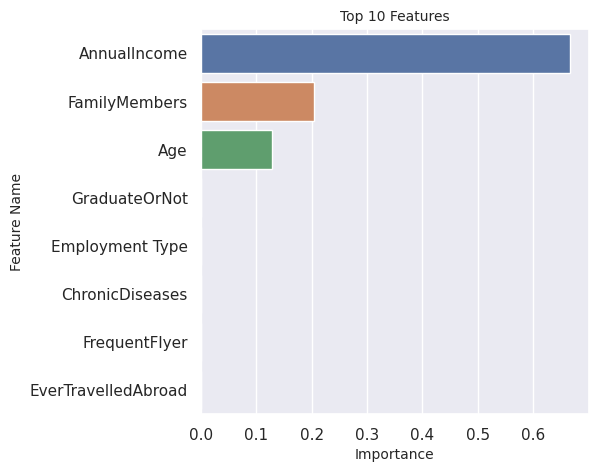

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(data=fi2,x='Importance',y='Feature Name')
plt.title("Top 10 Features",fontsize=10)
plt.xlabel("Importance",fontsize=10)
plt.ylabel("Feature Name",fontsize=10)
plt.show()

Text(0.5, 1.0, 'Accuracy score for decision tree 0.8266331658291457:')

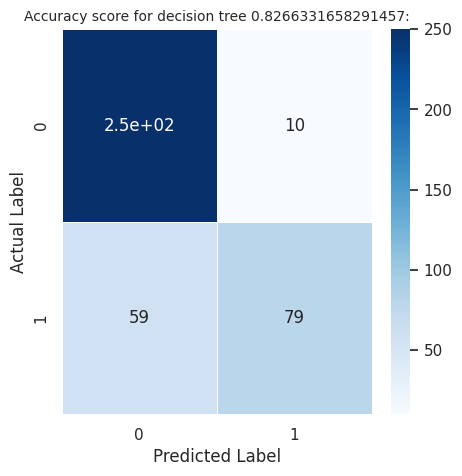

In [ ]:
#creating confusion matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=0.5,annot=True,cmap="Blues")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
all_sample_title="Accuracy score for decision tree {0}:".format(dtree.score(x_test,y_test))
plt.title(all_sample_title,size=10)

#We create a graphic representation of confusion matrix using heatmap

In [ ]:
#ROC and AUC Curve

from sklearn.metrics import roc_curve,roc_auc_score
y_pred_proba=dtree.predict_proba(x_test)[:,1]

In [ ]:
df_actual_predicted=pd.concat([pd.DataFrame(np.array(y_test),columns=['y_actual']),pd.DataFrame(np.array(y_pred_proba),columns=['y_pred_proba'])])

In [ ]:
fpr,tpr,tr=roc_curve(y_test,y_pred_proba)
fpr

array([0.        , 0.        , 0.02307692, 0.03846154, 0.71538462,
       0.86923077, 0.88076923, 1.        ])

In [ ]:
tr

array([2.        , 1.        , 0.97940724, 0.9280073 , 0.32049189,
       0.30648202, 0.18183444, 0.121811  ])

In [ ]:
#gives area under the Receiver Operating Characterstic

auc=roc_auc_score(y_test,y_pred_proba)
auc

0.7842391304347825

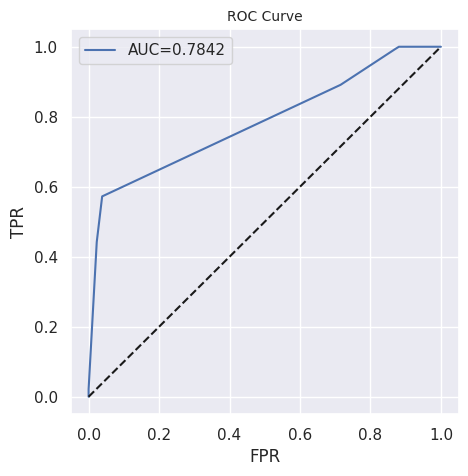

In [ ]:
#ROC-AUC Curve

plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,label='AUC=%0.4f'%auc)
plt.plot(fpr,fpr,linestyle='--',color='k')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve",size=10)
plt.legend()

In [ ]:
#RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(class_weight='balanced')
param_grid={'n_estimators':[100,200],'max_depth':[None,5,10],'max_features':['sqrt','log2',None],'random_state':[0,42]}

#Perform a GridSearchCV with cross validation to find the best hyperparameters
grid_search=GridSearchCV(rfc,param_grid,cv=5)
grid_search.fit(x_train,y_train)

#Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 'log2', 'n_estimators': 200, 'random_state': 0}


In [ ]:
rfc=RandomForestClassifier(random_state=0,n_estimators=200,max_features='log2',max_depth=5)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=200,
                       random_state=0)

In [ ]:
y_pred=rfc.predict(x_test)

#Printing all the Performance Metrics

print("Accuracy Score:",round(accuracy_score(y_test,y_pred)*100,2),"%")
print("F1 Score:",(f1_score(y_test,y_pred,average='micro')))
print("Precision Score:",(precision_score(y_test,y_pred,average='micro')))
print("Recall Score:",(recall_score(y_test,y_pred,average='micro')))
print("Jaccard Score:",(jaccard_score(y_test,y_pred,average='micro')))
print("Log Loss:",(log_loss(y_test,y_pred)))

Accuracy Score: 82.91 %
F1 Score: 0.8291457286432161
Precision Score: 0.8291457286432161
Recall Score: 0.8291457286432161
Jaccard Score: 0.7081545064377682
Log Loss: 6.158212136834086


Text(0, 0.5, 'Feature Name')

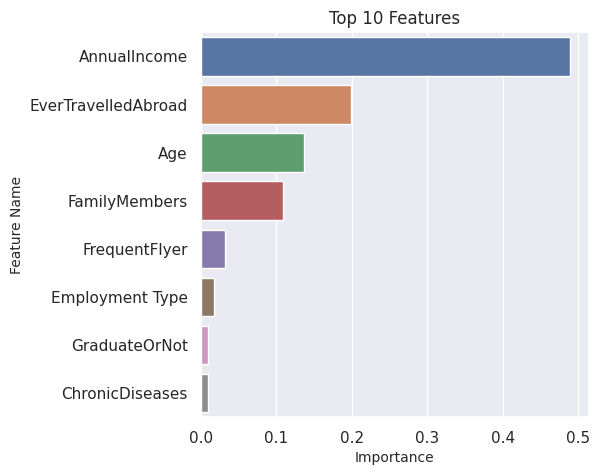

In [ ]:
#Checking the importance of each feature in making predictions if we use Random Forest
imp_df=pd.DataFrame({'Feature Name':x_train.columns,"Importance":rfc.feature_importances_})
fi=imp_df.sort_values(by='Importance',ascending=False)
fi2=fi.head(10)
plt.figure(figsize=(5,5))
sns.barplot(data=fi2,x="Importance",y='Feature Name')
plt.title("Top 10 Features")
plt.xlabel("Importance",fontsize=10)
plt.ylabel("Feature Name",fontsize=10)

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.8291457286432161')

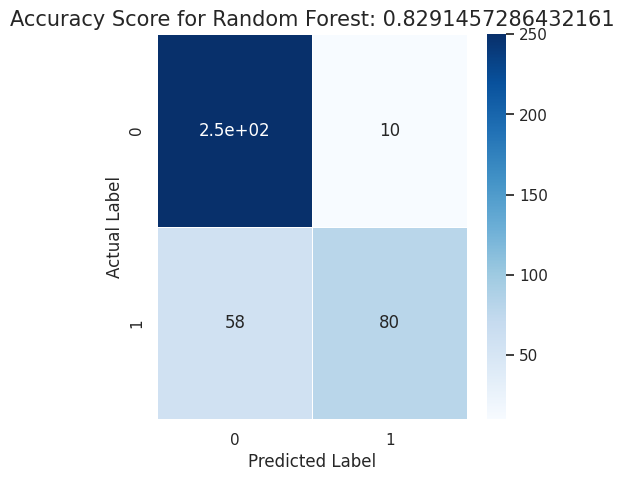

In [ ]:
#creating the confusion matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidth=0.5,annot=True,cmap="Blues")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
all_sample_title='Accuracy Score for Random Forest: {0}'.format(rfc.score(x_test,y_test))
plt.title(all_sample_title,size=15)

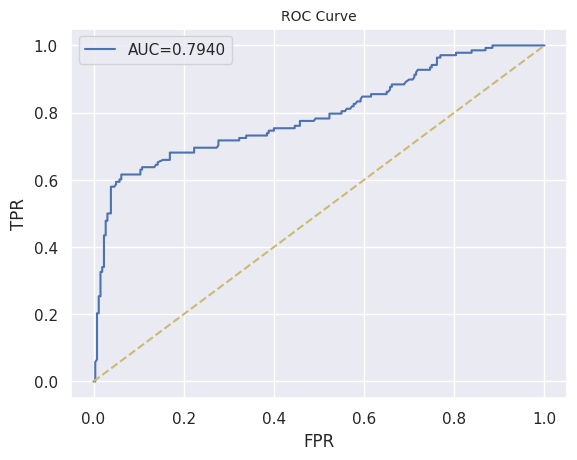

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_proba=rfc.predict_proba(x_test)[:,1]
fpr,tpr,tr=roc_curve(y_test,y_pred_proba)
auc=roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="AUC=%0.4f"%auc)
plt.plot(fpr,fpr,linestyle='--',color='y')
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.title("ROC Curve",size=10)
plt.legend()

In [ ]:
#XG Boost

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb=XGBClassifier()

param_grid={'n_estimators':[100,200],'max_depth':[3,5,10],'learning_rate':[0.1,0.01,0.001],'subsample':[0.8,1.0],'colsample_bytree':[0.8,1.0],'random_state':[0,42]}

grid_search=GridSearchCV(xgb,param_grid,cv=5)
grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'random_state': 0, 'subsample': 1.0}


In [ ]:
xgb=XGBClassifier(n_estimators=100,max_depth=3,learning_rate=0.01,subsample=1.0,colsample_bytree=0.8)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred=xgb.predict(x_test)

#printing Performance matrix
print("Accuarcy Score:",round(accuracy_score(y_test,y_pred)*100,2),"%")
print("F1 Score:",(f1_score(y_test,y_pred,average='micro')))
print("Precision Score:",(precision_score(y_test,y_pred,average='micro')))
print("Recall Score:",(recall_score(y_test,y_pred,average='micro')))
print("Jaccard Score:",(jaccard_score(y_test,y_pred,average='micro')))
print("Log Loss:",(log_loss(y_test,y_pred)))

Accuarcy Score: 82.66 %
F1 Score: 0.8266331658291457
Precision Score: 0.8266331658291457
Recall Score: 0.8266331658291457
Jaccard Score: 0.7044967880085653
Log Loss: 6.248774080022822


In [ ]:
#checing the importance of features that helped in prediction using xgboost
imp_df=pd.DataFrame({"Feature Name":x_train.columns,"Importance":xgb.feature_importances_})
imp_df

,Feature Name,Importance
0,Age,0.053281
1,Employment Type,0.011342
2,GraduateOrNot,0.005183
3,AnnualIncome,0.254861
4,FamilyMembers,0.190109
5,ChronicDiseases,0.000000
6,FrequentFlyer,0.026481
7,EverTravelledAbroad,0.458744


Text(0, 0.5, 'Feature Name')

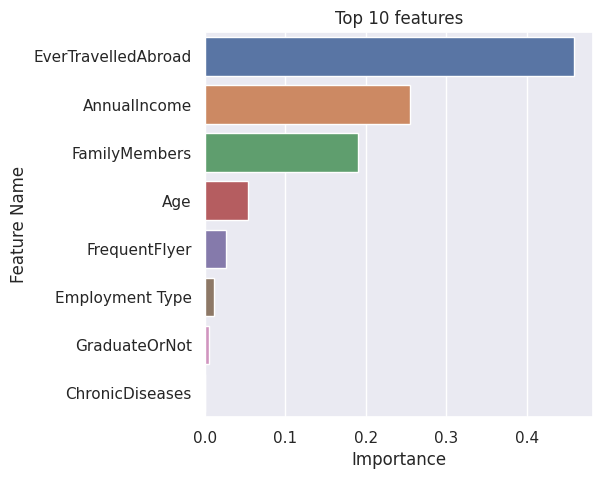

In [ ]:
fi=imp_df.sort_values(by="Importance",ascending=False)
fi2=fi.head(10)
plt.figure(figsize=(5,5))
sns.barplot(data=fi2,x="Importance",y="Feature Name")
plt.title("Top 10 features")
plt.xlabel("Importance")
plt.ylabel("Feature Name")

Text(0.5, 1.0, 'Accuracy score for XGBoost: 0.8266331658291457')

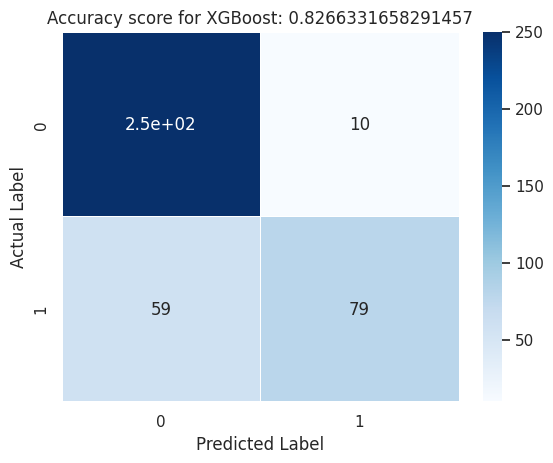

In [ ]:
#creating the confusion matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(data=cm,linewidth=0.5,annot=True,cmap='Blues')
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
all_sample_title='Accuracy score for XGBoost: {}'.format(xgb.score(x_test,y_test))
plt.title(all_sample_title)

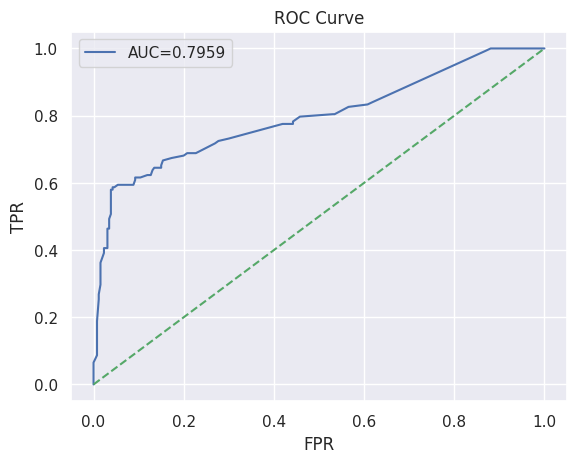

In [ ]:
#ROC Curve

from sklearn.metrics import roc_curve,roc_auc_score
y_pred_proba=xgb.predict_proba(x_test)[:,1]

fpr,tpr,tr=roc_curve(y_test,y_pred_proba)
auc=roc_auc_score(y_test,y_pred_proba)

plt.plot(fpr,tpr,label='AUC=%0.4f'%auc)
plt.plot(fpr,fpr,linestyle='--',color='g')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()

In [ ]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

In [ ]:
log=LogisticRegression()

In [ ]:
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=log.predict(x_test)

In [ ]:
#printing Performance matrix
print("Accuarcy Score:",round(accuracy_score(y_test,y_pred)*100,2),"%")
print("F1 Score:",(f1_score(y_test,y_pred,average='micro')))
print("Precision Score:",(precision_score(y_test,y_pred,average='micro')))
print("Recall Score:",(recall_score(y_test,y_pred,average='micro')))
print("Jaccard Score:",(jaccard_score(y_test,y_pred,average='micro')))
print("Log Loss:",(log_loss(y_test,y_pred)))

Accuarcy Score: 65.33 %
F1 Score: 0.6532663316582915
Precision Score: 0.6532663316582915
Recall Score: 0.6532663316582915
Jaccard Score: 0.48507462686567165
Log Loss: 12.497548160045648


Text(0.5, 1.0, 'Accuracy score for Logistic Regression: 0.6532663316582915')

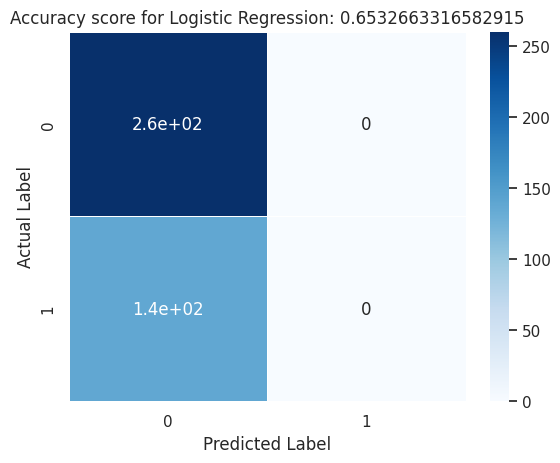

In [ ]:
#creating the confusion matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(data=cm,linewidth=0.5,annot=True,cmap='Blues')
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
all_sample_title='Accuracy score for Logistic Regression: {}'.format(log.score(x_test,y_test))
plt.title(all_sample_title)

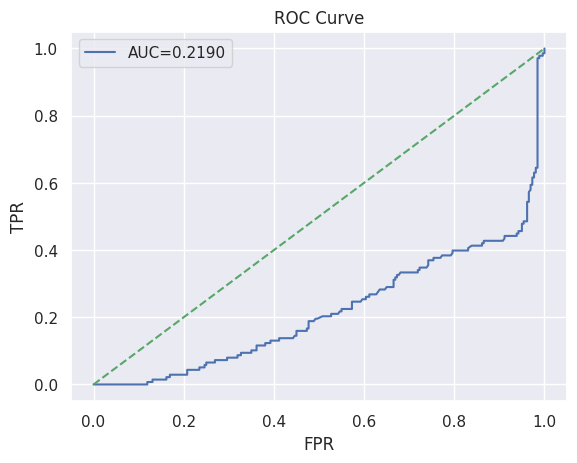

In [ ]:
#ROC Curve

from sklearn.metrics import roc_curve,roc_auc_score
y_pred_proba=log.predict_proba(x_test)[:,1]

fpr,tpr,tr=roc_curve(y_test,y_pred_proba)
auc=roc_auc_score(y_test,y_pred_proba)

plt.plot(fpr,tpr,label='AUC=%0.4f'%auc)
plt.plot(fpr,fpr,linestyle='--',color='g')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()